In [10]:
import pandas as pd

logs_raw = pd.read_json('data/logs.json')
logs_raw.head()


,timestamp,action,httpRequest,host
0,211256,ALLOW,"{'clientIp': '172.6.20.69', 'country': 'PH', '...",www.f81C.de
1,248639,ALLOW,"{'clientIp': '13.181.79.103', 'country': 'PH',...",www.Ip8n.de
2,152940,ALLOW,"{'clientIp': '168.199.225.84', 'country': 'PH'...",www.WN9V.de
3,147516,ALLOW,"{'clientIp': '127.199.221.38', 'country': 'PH'...",www.J6Nj.de
4,149819,ALLOW,"{'clientIp': '34.77.119.65', 'country': 'PH', ...",www.NoE6.de


In [11]:
# Auflösen der 'data'-Spalte
normalized_df = pd.json_normalize(logs_raw['httpRequest'])

# Zusammenführen mit der ursprünglichen ID
logs = pd.concat([logs_raw, normalized_df], axis=1)
logs.drop(['httpRequest'], axis=1, inplace=True)
logs.head()

,timestamp,action,host,clientIp,country,uri
0,211256,ALLOW,www.f81C.de,172.6.20.69,PH,/placeholder
1,248639,ALLOW,www.Ip8n.de,13.181.79.103,PH,/placeholder
2,152940,ALLOW,www.WN9V.de,168.199.225.84,PH,/placeholder
3,147516,ALLOW,www.J6Nj.de,127.199.221.38,PH,/placeholder
4,149819,ALLOW,www.NoE6.de,34.77.119.65,PH,/placeholder


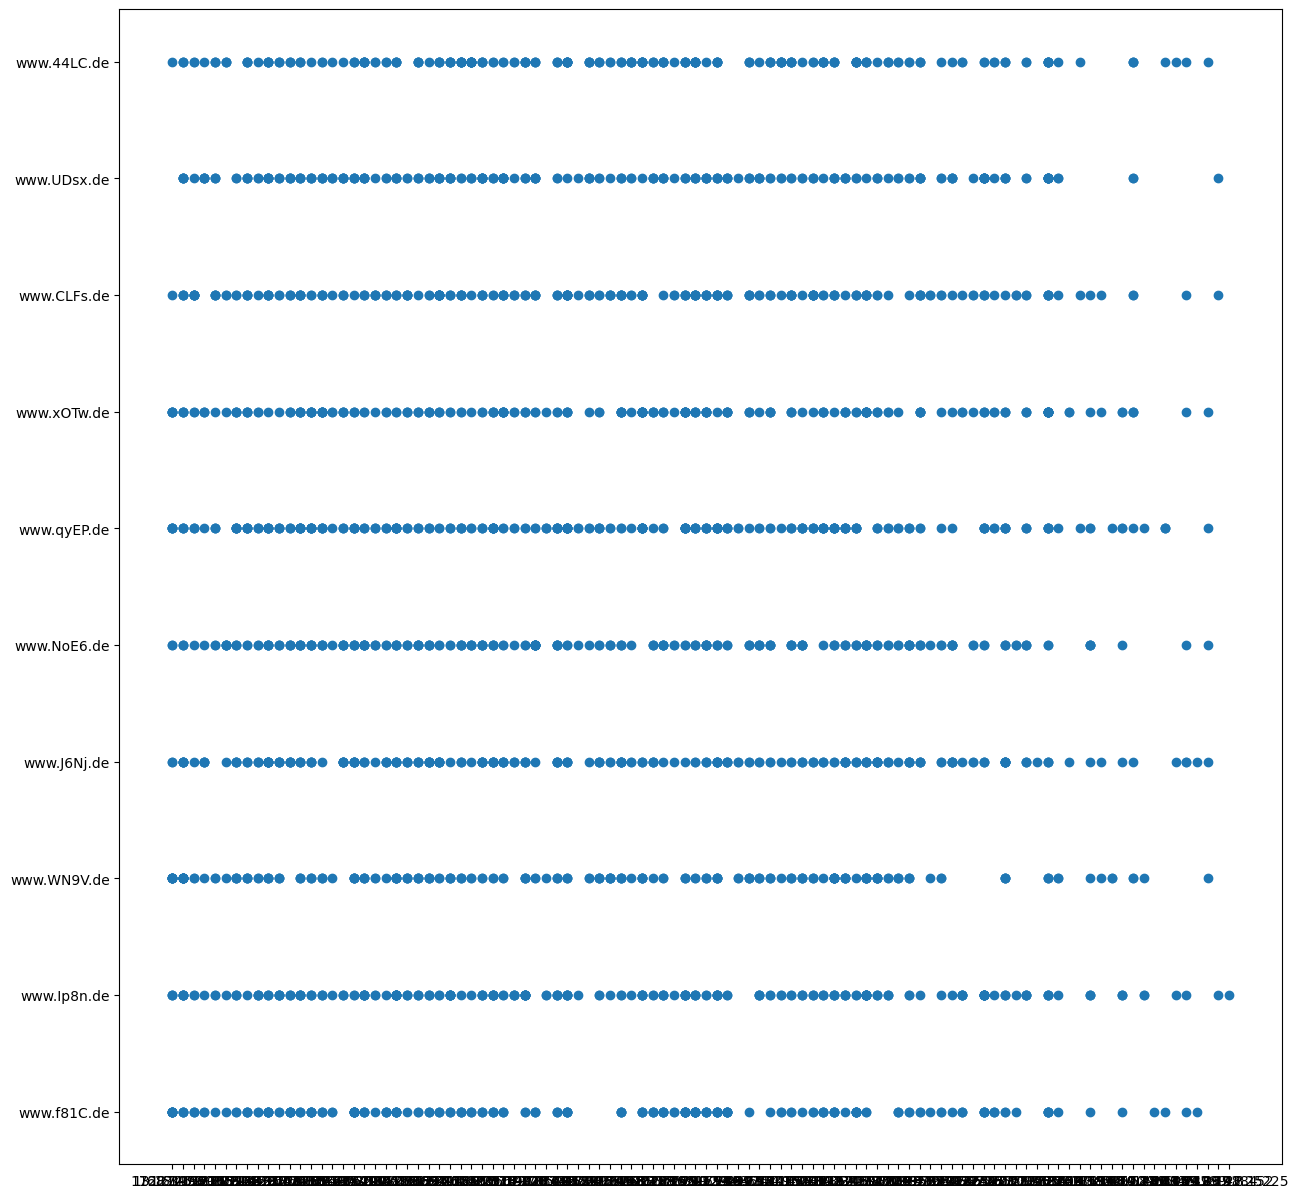

In [20]:
import matplotlib.pyplot as plt

plt.figure(
    figsize=(15, 15)
)

#plt.scatter(logs['clientIp'], logs['timestamp'])
plt.scatter(logs['clientIp'], logs['host'])